In [1]:
! which python

/Users/no_lineal/opt/anaconda3/envs/bitmusic38/bin/python


In [2]:
#! pip install tqdm -q
#! pip install pretty_midi -q
#! pip install librosa -q
#! pip install -U matplotlib -q

In [3]:
import numpy as np
import librosa

import pretty_midi

from tqdm import tqdm

import os 

# viz
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
"""

    where am i?
    
"""

PATH = os.getcwd() + '/'
data_path = PATH + 'data/'
midi_path = data_path + '/nesmdb_midi/train/'

print(f'PATH: {PATH}')
print(f'data path: {data_path}')
print(f'midi path: {midi_path}')

PATH: /Users/no_lineal/Documents/GitHub/mir_project/
data path: /Users/no_lineal/Documents/GitHub/mir_project/data/
midi path: /Users/no_lineal/Documents/GitHub/mir_project/data//nesmdb_midi/train/


In [5]:
"""

    load midi files

"""

sample_space = sorted(os.listdir( midi_path ))

print(f'sample space size: {len(sample_space)}')

sample space size: 4502


In [6]:
"""

    get the pianoroll representation

"""

sample_space = np.random.choice( sample_space, 100 )

midi = {}
midi_error = []

for s in tqdm(sample_space):

    try:
        
        # piano roll representation
        aux = pretty_midi.PrettyMIDI( midi_path + s ).get_piano_roll( fs=100 )
        
        # log-frequency spectogram
        aux = librosa.amplitude_to_db(
            librosa.feature.melspectrogram(
                y=None, 
                sr=100, 
                S=aux.T, 
                n_fft=2048, 
                hop_length=512, 
                power=2.0, 
                n_mels=128), 
            ref=1.0
        )

        midi[ s ] = aux
        
    except:
        print(f'error: {s}')
        midi_error.append(s)
        
print(f'corrupted files: {len(midi_error)}')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 25.70it/s]

corrupted files: 0


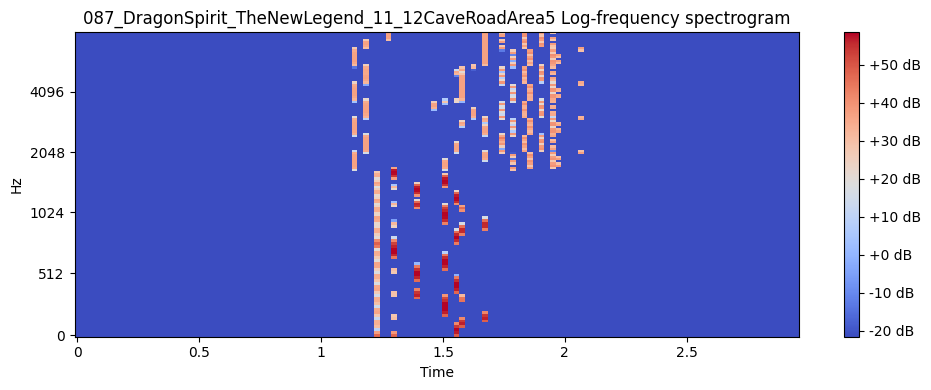

In [7]:
"""

    viz spectogram

"""

sample = np.random.choice( list(midi.keys()) )

plt.figure(figsize=(10, 4))
librosa.display.specshow( midi[ sample ], y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(f'{sample.replace(".mid", "")} Log-frequency spectrogram')
plt.tight_layout()
plt.show()